# HOG of image:

In [2]:
# imports
import os
from os import listdir
from os.path import isfile, join

import numpy as np
from scipy import stats
import pickle

import pandas as pd
from skimage import (io, feature, color, exposure)
from skimage.transform import resize
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
# consts:
dataset_path = '/Users/nikhilarora/data/fydp/dataset'
car_b_path = '/Users/nikhilarora/data/fydp/dataset/car'
ncar_b_path = '/Users/nikhilarora/data/fydp/dataset/ncar'
#model_path = '/Users/nikhilarora/dev/github/fydp-codebase/models/finalized_model_v2.p'
model_path = '/Users/nikhilarora/data/fydp/models/finalized_model_v2.p'

In [77]:
class Classifier(object):
    """Classifier class that will hold the model and its actions
    Params
    ------
    - cfg_classifier
    - serial_path
    - model
    Methods
    -------
    - bool:predict(feat_vect)
    - sklearn_model:_init_model()
    """
    def __init__(self, clf_path):
        self.clf_path = clf_path
        self.model = self._init_model()

    def _init_model(self):
        """reads serialized model back to mem."""
        return pickle.load(open(self.clf_path, 'rb'))

    def predict(self, feat_vect):
        """returns prediction based on current model"""
        pred_val = self.model.predict(feat_vect)
        if type(pred_val) == list:
            return bool(pred_val[0])
        else:
            return bool(pred_val)


In [78]:
clf = Classifier(model_path)

In [79]:
# get all files from dir:
carfiles = [f for f in listdir(car_b_path) if isfile(join(car_b_path, f))]
ncarfiles = [f for f in listdir(ncar_b_path) if isfile(join(ncar_b_path, f))]

In [80]:
# read files into image list:
car_imgs = [io.imread(join(car_b_path, f)) for f in carfiles]
ncar_imgs = [io.imread(join(ncar_b_path, f)) for f in ncarfiles]

In [81]:
# define container to store hog feature vect and label
feature_vs = []
lbls = []

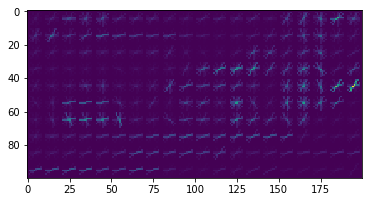

In [82]:
# first process event instances
for im in car_imgs:

    gray = color.rgb2gray(im)
    # NOTE: might need to do the whole contour thing, can see later...
    gray_rs = resize(gray, (100, 200), mode='constant')
    plt.imshow(gray_rs,cmap='gray')


    (H, hogImage) = feature.hog(gray_rs, orientations=9, pixels_per_cell=(10, 10),\
            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualise=True)
    feature_vs.append(H)
    lbls.append(True)

    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    plt.imshow(hogImage)
    #     cl = 1
    #     feature_vs.append(H)
    #     lbls.append(cl)

    # # extract Histogram of Oriented Gradients from the test image and
    # # predict the make of the car
    # (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
    #     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
    # 	pred = model.predict(H.reshape(1, -1))[0]

    # 	# visualize the HOG image
    # 	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    # 	hogImage = hogImage.astype("uint8")
    # 	cv2.imshow("HOG Image", hogImage)

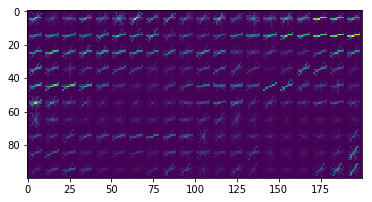

In [83]:
# then process non-event instances
for im in ncar_imgs:

    gray = color.rgb2gray(im)
    # NOTE: might need to do the whole contour thing, can see later...
    gray_rs = resize(gray, (100, 200), mode='constant')
    plt.imshow(gray_rs,cmap='gray')


    (H, hogImage) = feature.hog(gray_rs, orientations=9, pixels_per_cell=(10, 10),\
            cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys', visualise=True)
    feature_vs.append(H)
    lbls.append(False)

    hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    hogImage = hogImage.astype("uint8")
    plt.imshow(hogImage)
    #     cl = 1
    #     feature_vs.append(H)
    #     lbls.append(cl)

    # # extract Histogram of Oriented Gradients from the test image and
    # # predict the make of the car
    # (H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),
    #     cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
    # 	pred = model.predict(H.reshape(1, -1))[0]

    # 	# visualize the HOG image
    # 	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
    # 	hogImage = hogImage.astype("uint8")
    # 	cv2.imshow("HOG Image", hogImage)

In [84]:
for i, H in enumerate(feature_vs):
    print('Prediction: ', str(clf.predict(H)), ' lbl: ', str(lbls[i]))

Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction:  True  lbl:  True
Prediction

/Users/nikhilarora/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/nikhilarora/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/nikhilarora/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it cont